In [1]:
# imports the traffic detectors dataset
import pandas as pd
traffic_dataset = pd.read_csv("Traffic_Detectors_20241113.csv")
# reads the dataset
print("DATASET INFORMATION")
traffic_dataset.info()
print("\nFirst Rows of Traffic_Detectors_20241113.csv")
traffic_dataset.head()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5352 entries, 0 to 5351
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   detector_id               5352 non-null   int64  
 1   detector_type             5352 non-null   object 
 2   detector_status           5351 non-null   object 
 3   detector_direction        5327 non-null   object 
 4   detector_movement         5326 non-null   object 
 5   location_name             5336 non-null   object 
 6   atd_location_id           5336 non-null   object 
 7   signal_id                 5336 non-null   float64
 8   created_date              4682 non-null   object 
 9   modified_date             5352 non-null   object 
 10  ip_comm_status            0 non-null      float64
 11  comm_status_datetime_utc  0 non-null      float64
 12  location_latitude         0 non-null      float64
 13  location_longitude        0 non-null      f

,detector_id,detector_type,detector_status,detector_direction,detector_movement,location_name,atd_location_id,signal_id,created_date,modified_date,ip_comm_status,comm_status_datetime_utc,location_latitude,location_longitude,LOCATION
0,6935,LOOP,NaN,NaN,NaN,NaN,NaN,NaN,07/21/2019 12:00:00 AM,07/21/2019 03:20:00 PM +0000,NaN,NaN,NaN,NaN,NaN
1,8856,RADAR - Iteris,OK,EASTBOUND,"LEFT TURN, THRU / RIGHT TURN",AIRPORT BLVD / DENSON DR,LOC16-000080,17.0,06/06/2024 12:00:00 AM,06/06/2024 05:55:00 PM +0000,NaN,NaN,NaN,NaN,POINT (-97.71608 30.327032)
2,127,VIDEO,OK,NORTHBOUND,RIGHT TURN,2901 BLK E PARMER LN (Samsung Plant Driveway),LOC16-002755,562.0,NaN,06/17/2024 02:42:00 PM +0000,NaN,NaN,NaN,NaN,POINT (-97.635544 30.378025)
3,963,VIDEO,OK,SOUTHBOUND,LEFT TURN,MEARNS MEADOW BLVD / RUTLAND DR,LOC16-002385,486.0,NaN,03/20/2024 06:51:00 PM +0000,NaN,NaN,NaN,NaN,POINT (-97.70063 30.367003)
4,517,LOOP,REMOVED,NORTHBOUND,LEFT TURN,BURNET RD / GREENLAWN PKWY,LOC16-000395,80.0,NaN,04/28/2022 07:59:00 PM +0000,NaN,NaN,NaN,NaN,POINT (-97.735779 30.348255)


In [2]:
# Statistical Summary
print("Statistical Summary of Traffic_Detectors_20241113.csv")
traffic_dataset.describe()

Statistical Summary of Traffic_Detectors_20241113.csv


,detector_id,signal_id,ip_comm_status,comm_status_datetime_utc,location_latitude,location_longitude
count,5352.000000,5336.000000,0.0,0.0,0.0,0.0
mean,5275.284193,595.256934,NaN,NaN,NaN,NaN
std,2793.658867,377.072325,NaN,NaN,NaN,NaN
min,3.000000,2.000000,NaN,NaN,NaN,NaN
25%,2792.750000,361.000000,NaN,NaN,NaN,NaN
50%,5965.500000,608.000000,NaN,NaN,NaN,NaN
75%,7710.250000,840.000000,NaN,NaN,NaN,NaN
max,9167.000000,4124.000000,NaN,NaN,NaN,NaN


In [ ]:
# 1. DATA PRE-PROCESSING

In [3]:
# Imports necessary for pre-processing data
import numpy as np
import geopandas as gpd
from datetime import datetime

# 1.1 Extract latitude and longitude from the `LOCATION` column
def extract_lat_lon(location):
    if pd.isnull(location):
        return np.nan, np.nan
    location = location.replace("POINT (", "").replace(")", "")
    lon, lat = map(float, location.split())
    return lat, lon

traffic_dataset[['latitude', 'longitude']] = traffic_dataset['LOCATION'].apply(
    lambda loc: pd.Series(extract_lat_lon(loc))
)

In [4]:
# 1.2. Convert `created_date` and `modified_date` to datetime objects
traffic_dataset['created_date'] = pd.to_datetime(traffic_dataset['created_date'], errors='coerce')
traffic_dataset['modified_date'] = pd.to_datetime(traffic_dataset['modified_date'], errors='coerce')

C:\Users\as237\AppData\Local\Temp\ipykernel_22504\3806406862.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traffic_dataset['created_date'] = pd.to_datetime(traffic_dataset['created_date'], errors='coerce')
C:\Users\as237\AppData\Local\Temp\ipykernel_22504\3806406862.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traffic_dataset['modified_date'] = pd.to_datetime(traffic_dataset['modified_date'], errors='coerce')


In [5]:
# 1.3. Handle missing values
# Fill missing `detector_status` with "UNKNOWN"
traffic_dataset['detector_status'].fillna('UNKNOWN', inplace=True)

# Fill missing `detector_direction` and `detector_movement` with mode
traffic_dataset['detector_direction'].fillna(traffic_dataset['detector_direction'].mode()[0], inplace=True)
traffic_dataset['detector_movement'].fillna(traffic_dataset['detector_movement'].mode()[0], inplace=True)

# Drop unused columns
traffic_dataset.drop(['ip_comm_status', 'comm_status_datetime_utc', 'location_latitude', 'location_longitude'], axis=1, inplace=True)

# Save cleaned data for further use
cleaned_file_path = "Cleaned_Traffic_Detectors.csv"
traffic_dataset.to_csv(cleaned_file_path, index=False)

C:\Users\as237\AppData\Local\Temp\ipykernel_22504\3517390139.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traffic_dataset['detector_status'].fillna('UNKNOWN', inplace=True)
C:\Users\as237\AppData\Local\Temp\ipykernel_22504\3517390139.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [ ]:
# Explanation of Step 1
# 1.1 Extract Latitude and Longitude: The LOCATION column contains spatial coordinates in a string format. 
# We parsed these into two separate columns: latitude and longitude.
# 1.2 Datetime Conversion: Converted the created_date and modified_date columns to datetime for easier handling of time-based operations.
# 1.3 Handling Missing Values:
#     detector_status: Replaced missing values with "UNKNOWN" as a placeholder.
#     detector_direction and detector_movement: 
#         Replaced missing values with the mode (most frequent value) since these are categorical columns.
# 1.4 Dropped Irrelevant Columns: Removed columns that are entirely empty or redundant.
# 1.5 Saved Cleaned Data: Saved the cleaned dataset for further analysis.

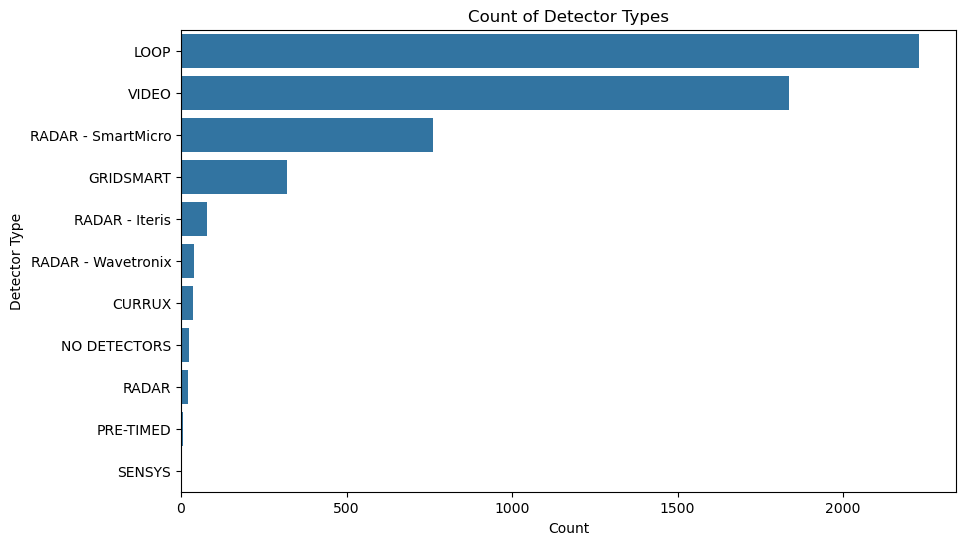

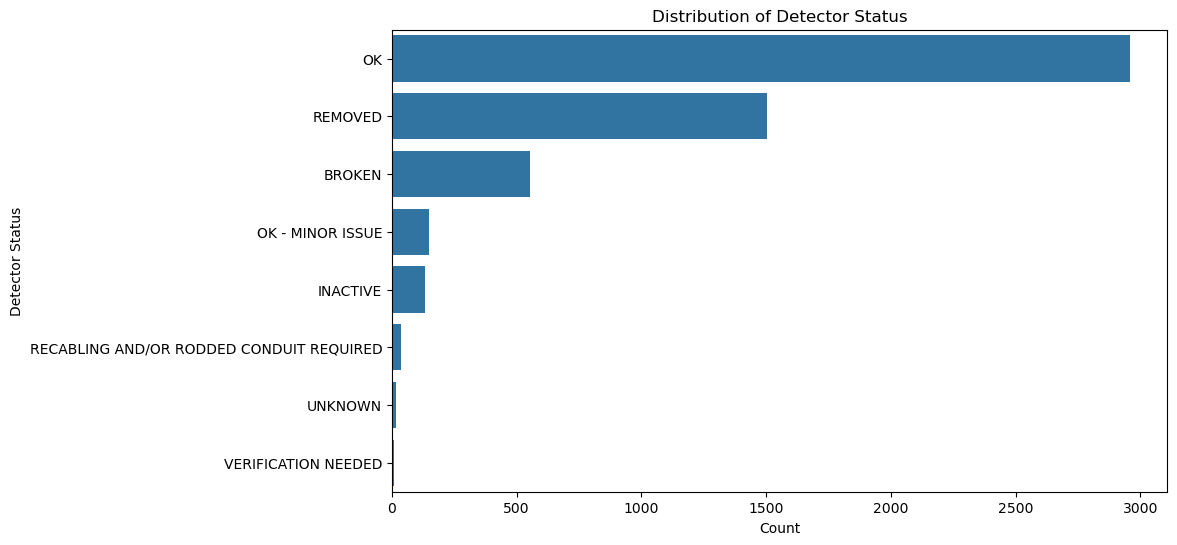

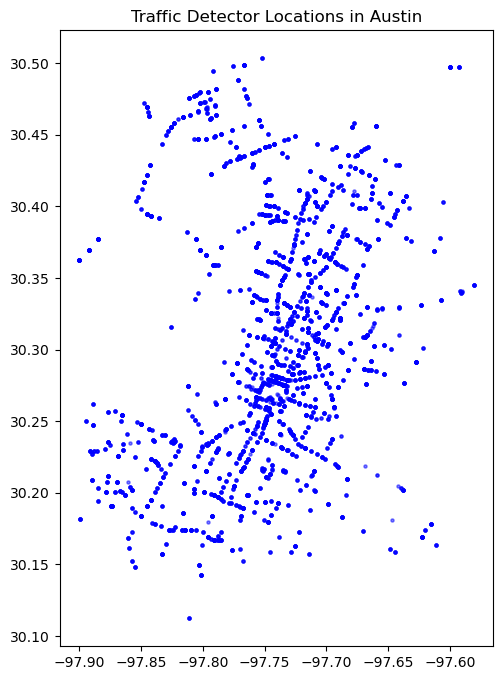

In [6]:
# 2. Exploratory Data Analysis

# Necessary Imports
import matplotlib.pyplot as plt
import seaborn as sns

# 2.1. Plot detector types
plt.figure(figsize=(10, 6))
sns.countplot(y='detector_type', data=traffic_dataset, order=traffic_dataset['detector_type'].value_counts().index)
plt.title("Count of Detector Types")
plt.xlabel("Count")
plt.ylabel("Detector Type")
plt.show()

# 2.2. Plot detector status distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='detector_status', data=traffic_dataset, order=traffic_dataset['detector_status'].value_counts().index)
plt.title("Distribution of Detector Status")
plt.xlabel("Count")
plt.ylabel("Detector Status")
plt.show()

# 2.3. Geospatial visualization using GeoPandas
gdf = gpd.GeoDataFrame(
    traffic_dataset, 
    geometry=gpd.points_from_xy(traffic_dataset.longitude, traffic_dataset.latitude),
    crs="EPSG:4326"
)

# 2.4. Plot Austin map with detectors
gdf.plot(markersize=5, figsize=(10, 8), color="blue", alpha=0.5)
plt.title("Traffic Detector Locations in Austin")
plt.show()

In [ ]:
# Explanation of Step 2
# 2.1. Visualization of Detector Types: Used a bar chart to show the count of each detector_type, 
#       providing insights into the type of devices used across Austin.
# 2.2. Distribution of Detector Status: Displayed the distribution of operational states (OK, REMOVED, etc.), 
#      highlighting potential data imbalances.
# 2.3. Spatial Plotting: Used GeoPandas to map detector locations on a basic geospatial plot, 
#      giving a visual sense of detector distribution.

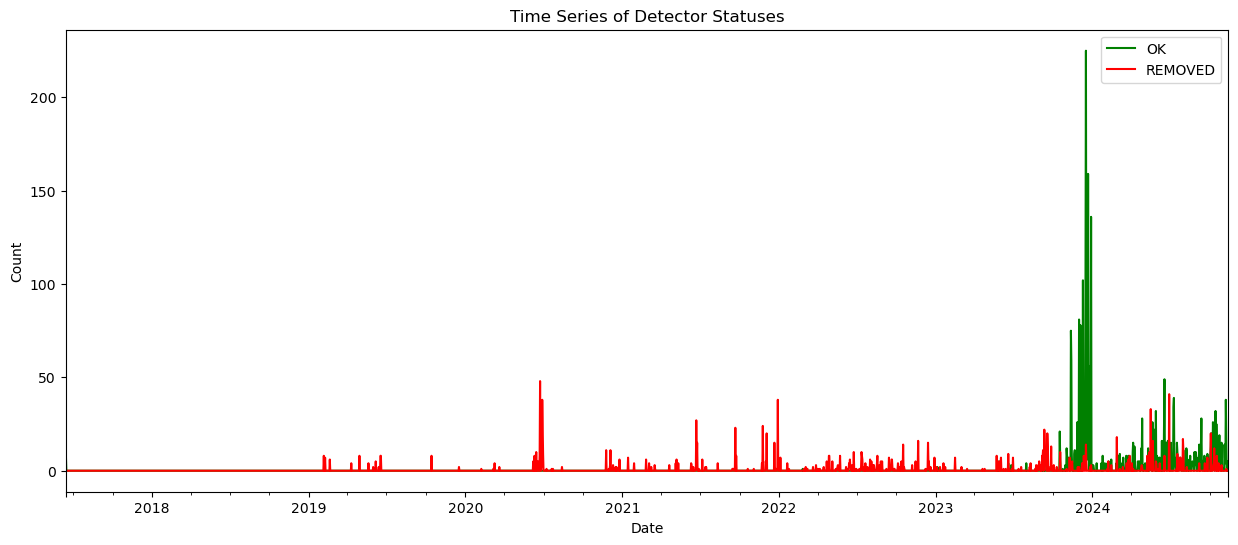

In [7]:
# 3. Times Series Analysis
# 3.1. Group data by date and status
time_series_data = traffic_dataset.groupby(['modified_date', 'detector_status']).size().unstack(fill_value=0)

# 3.2. Resample daily counts
daily_counts = time_series_data.resample('D').sum()

# 3.3. Plot time series of active detectors
plt.figure(figsize=(15, 6))
daily_counts['OK'].plot(label='OK', color='green')
daily_counts['REMOVED'].plot(label='REMOVED', color='red')
plt.title("Time Series of Detector Statuses")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

In [ ]:
# Explanation of Step 3
# 3.1. Grouped Data by Date: Aggregated the count of detectors by modified_date and detector_status to identify trends over time.
# 3.2. Resampled Data: Resampled the data to a daily frequency to smooth variations and analyze trends.
# 3.3. Plotted Trends: Plotted the active (OK) time series and removed detectors to observe operational patterns.

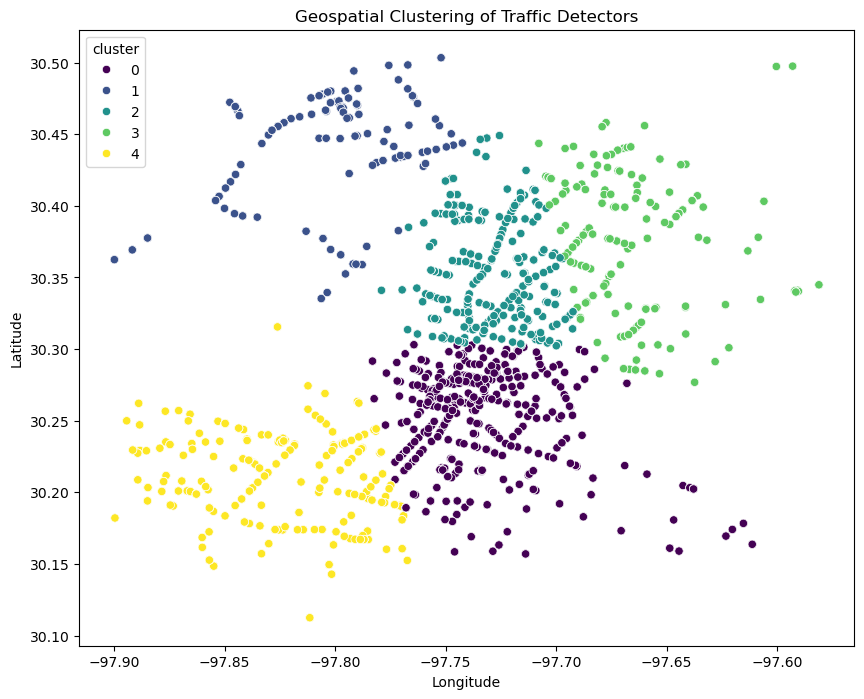

In [8]:
# 4. Clustering Analysis

# Necessary imports
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 4.1. Prepare data for clustering
clustering_data = traffic_dataset[['latitude', 'longitude']].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# 4.2. K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clustering_data['cluster'] = kmeans.fit_predict(scaled_data)

# 4.3. Plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=clustering_data['longitude'], y=clustering_data['latitude'], hue=clustering_data['cluster'], palette='viridis')
plt.title("Geospatial Clustering of Traffic Detectors")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
# Explanation of Step 4
# 4.1. Preprocessing: Extracted valid latitude and longitude pairs and standardized the data for clustering.
# 4.2. K-Means Clustering: Applied K-Means to group detectors into spatial clusters, identifying high-traffic zones or distinct detector groups.
# 4.3. Visualization: Plotted clusters on a scatter plot, showing spatial relationships.

In [9]:
# 5: Predictive Modeling (Detector Status Prediction)
# predicts the operational status (detector_status) based on other features.

# Necessary imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Encode categorical variables
encoded_data = pd.get_dummies(traffic_dataset[['detector_type', 'detector_direction', 'detector_movement']], drop_first=True)

# Prepare features (X) and target (y)
X = pd.concat([encoded_data, traffic_dataset[['latitude', 'longitude']].fillna(0)], axis=1)
y = traffic_dataset['detector_status'].apply(lambda x: 1 if x == 'OK' else 0)  # Binary classification: 'OK' vs others

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[454 265]
 [262 625]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63       719
           1       0.70      0.70      0.70       887

    accuracy                           0.67      1606
   macro avg       0.67      0.67      0.67      1606
weighted avg       0.67      0.67      0.67      1606


Accuracy Score: 0.6718555417185554


In [ ]:
# Explanation of Step 5
# 5.1. Feature Encoding: Encoded categorical features (e.g., detector_type, detector_direction) into numerical values using one-hot encoding.
# 5.2. Feature-Target Split: Prepared the features (X) and target variable (y), where y was binary (1 = OK, 0 = Not OK).
# 5.3. Model Training: Used a Random Forest Classifier to predict the operational status.
# 5.4. Evaluation: Evaluated the model’s performance using metrics like accuracy, confusion matrix, and classification report.

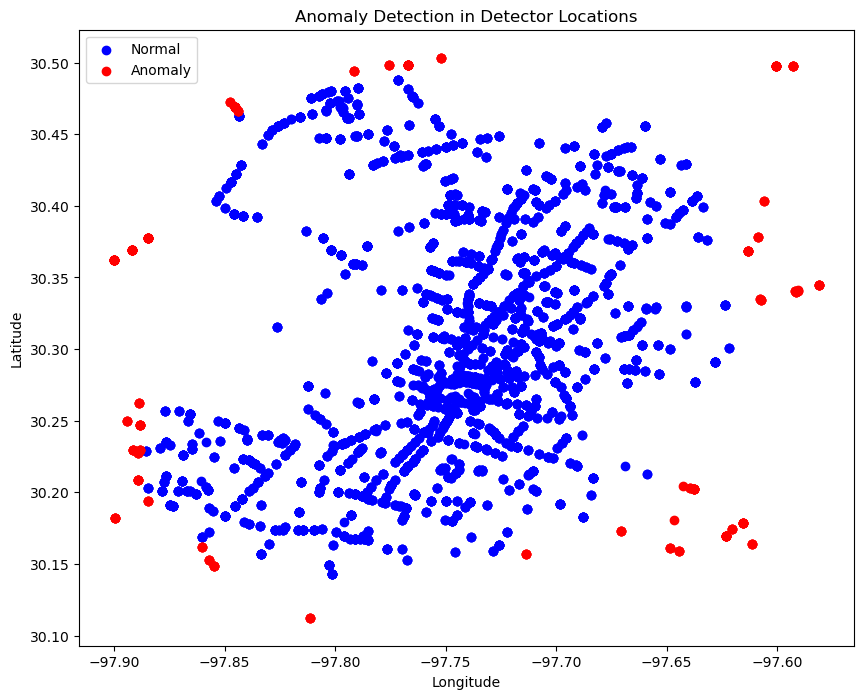

In [10]:
# 6 Anomaly Detection in Detector Data
# This step uses unsupervised learning to detect anomalies (e.g., unusual detector locations or patterns).

# Necessary imports
from sklearn.ensemble import IsolationForest

# Prepare data for anomaly detection
anomaly_data = traffic_dataset[['latitude', 'longitude']].dropna()

# Fit Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
anomaly_data['anomaly_score'] = isolation_forest.fit_predict(anomaly_data)

# Separate normal and anomalous points
normal_points = anomaly_data[anomaly_data['anomaly_score'] == 1]
anomalous_points = anomaly_data[anomaly_data['anomaly_score'] == -1]

# Visualize anomalies
plt.figure(figsize=(10, 8))
plt.scatter(normal_points['longitude'], normal_points['latitude'], color='blue', label='Normal')
plt.scatter(anomalous_points['longitude'], anomalous_points['latitude'], color='red', label='Anomaly')
plt.title("Anomaly Detection in Detector Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [ ]:
# Explanation of Step 6
# 6.1. Anomaly Detection Model: Used an Isolation Forest, which identifies anomalies 
# by learning the distribution of the dataset and isolating outliers.
# 6.2. Contamination Level: Set contamination to 5%, meaning ~5% of data points are treated as anomalies.
# 6.3. Visualization: Highlighted normal points in blue and anomalies in red on a scatter plot.

In [11]:
# 7. Optimization Techniques for Traffic Flow
# optimize traffic flow by identifying the busiest zones and suggesting improvements based on detector data.

# Necessary imports
from scipy.optimize import minimize

# Define traffic intensity based on the presence of OK detectors in a region
def traffic_intensity(data):
    return data.groupby(['latitude', 'longitude'])['detector_status'].apply(
        lambda x: (x == 'OK').sum()
    )

# 7.1. Aggregate traffic intensity
intensity_data = traffic_intensity(traffic_dataset)
intensity_data = intensity_data.reset_index()
intensity_data.columns = ['latitude', 'longitude', 'intensity']

# 7.2. Objective function to minimize traffic intensity in a specific zone
def objective_function(coords):
    # Assume coords is a point (lat, lon), minimize distance to high-intensity areas
    dist = ((intensity_data['latitude'] - coords[0])**2 + 
            (intensity_data['longitude'] - coords[1])**2)**0.5
    weighted_dist = (dist * intensity_data['intensity']).sum()
    return weighted_dist

# Initial guess for the optimal traffic center
initial_guess = [30.2672, -97.7431]  # Approximate center of Austin, TX

# 7.3. Perform optimization
result = minimize(objective_function, initial_guess, method='BFGS')
optimal_coords = result.x

print("Optimal Coordinates to Address Traffic Intensity:", optimal_coords)

Optimal Coordinates to Address Traffic Intensity: [ 30.29880327 -97.73785624]


In [ ]:
# Explanation of Step 7
# 7.1. Traffic Intensity Calculation: Aggregated the number of OK detectors at specific latitude-longitude pairs to estimate traffic intensity.
# 7.2. Objective Function: Defined a function to minimize weighted distances to high-intensity areas, aiming to identify optimal intervention points.
# 7.3. Optimization: Used scipy.optimize.minimize with the BFGS method to find the best location for addressing traffic congestion.

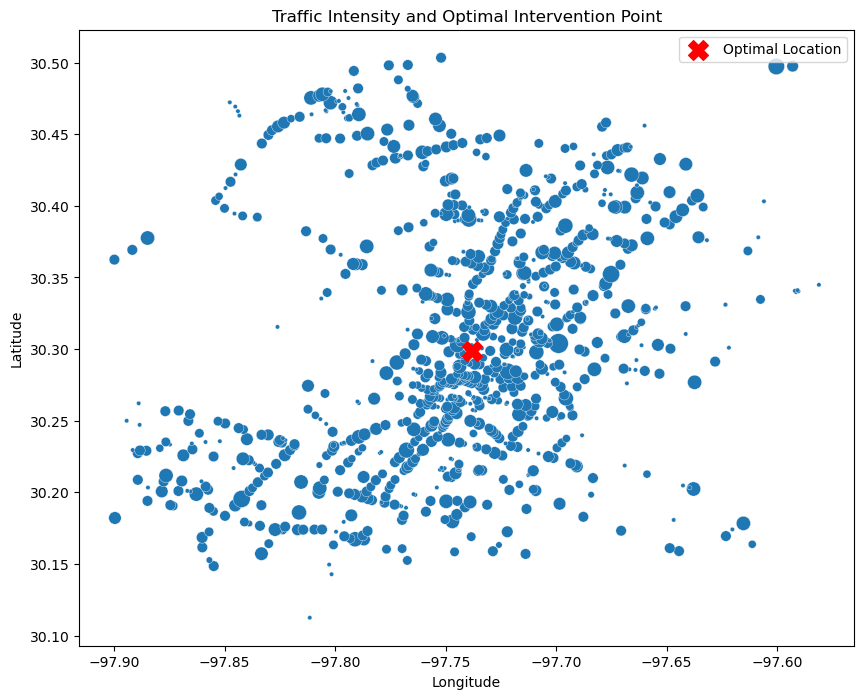

In [12]:
# 8. Visualization of Results
# Plot traffic intensity and optimal coordinates
plt.figure(figsize=(10, 8))
sns.scatterplot(data=intensity_data, x='longitude', y='latitude', size='intensity', sizes=(10, 200), legend=False)
plt.scatter(optimal_coords[1], optimal_coords[0], color='red', label='Optimal Location', s=200, marker='X')
plt.title("Traffic Intensity and Optimal Intervention Point")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [ ]:
# Explanation of Step 8
# 8.1. Traffic Intensity Plot: Visualized traffic intensity as a scatter plot with point size proportional to the intensity.
# 8.2. Optimal Location Highlight: Marked the optimal intervention point with a distinct red marker for easy identification.

In [22]:
# 9. Route Optimization Using Reinforcement Learning (RL)
# use Reinforcement Learning to suggest optimized traffic routes. 
# The RL agent learns from the traffic intensity data to minimize congestion by suggesting alternative paths.

# Necessary imports
import numpy as np
import gym
from gym import spaces
from scipy.spatial import KDTree

# Define a custom environment for route optimization
class TrafficEnv(gym.Env):
    def __init__(self, traffic_data):
        super(TrafficEnv, self).__init__()
        self.traffic_data = traffic_data  # Traffic intensity data
        self.max_steps = 100  # Max steps in an episode
        self.current_step = 0
        self.current_location = (30.2672, -97.7431)  # Start at city center (Austin, TX)

        # Precompute KDTree for efficient nearest neighbor lookup
        self.tree = KDTree(self.traffic_data[['latitude', 'longitude']])

        # Define action and observation space
        # Actions: move N, S, E, W, NE, NW, SE, SW
        self.action_space = spaces.Discrete(8)
        # Observation space: latitude, longitude, and normalized traffic intensity
        self.observation_space = spaces.Box(
            low=np.array([-90, -180, 0]), high=np.array([90, 180, 1]), dtype=np.float32
        )

    def step(self, action):
        self.current_step += 1

        # Define movement directions
        movements = {
            0: (0.001, 0),    # North
            1: (-0.001, 0),   # South
            2: (0, 0.001),    # East
            3: (0, -0.001),   # West
            4: (0.001, 0.001),  # NE
            5: (0.001, -0.001), # NW
            6: (-0.001, 0.001), # SE
            7: (-0.001, -0.001) # SW
        }

        # Update location based on action
        move = movements[action]
        self.current_location = (
            self.current_location[0] + move[0],
            self.current_location[1] + move[1]
        )

        # Get nearest traffic intensity using KDTree
        dist, nearest_index = self.tree.query(self.current_location)
        traffic_intensity = self.traffic_data.iloc[nearest_index]['intensity']

        # Normalize traffic intensity for reward calculation
        max_intensity = self.traffic_data['intensity'].max()
        normalized_intensity = traffic_intensity / max_intensity

        # Calculate reward: lower intensity = higher reward
        reward = -normalized_intensity

        # Define done condition
        done = self.current_step >= self.max_steps

        # Return observation, reward, done, and info
        observation = np.array([self.current_location[0], self.current_location[1], normalized_intensity])
        return observation, reward, done, {}

    def reset(self):
        self.current_step = 0
        self.current_location = (30.2672, -97.7431)  # Reset to city center
        _, nearest_index = self.tree.query(self.current_location)
        traffic_intensity = self.traffic_data.iloc[nearest_index]['intensity']
        normalized_intensity = traffic_intensity / self.traffic_data['intensity'].max()
        return np.array([self.current_location[0], self.current_location[1], normalized_intensity])

In [23]:
# Sample test
import pandas as pd

# Example traffic data
data = {
    'latitude': [30.2672, 30.2673, 30.2674],
    'longitude': [-97.7431, -97.7432, -97.7433],
    'intensity': [100, 50, 20]
}
traffic_data = pd.DataFrame(data)

# Initialize environment
env = TrafficEnv(traffic_data)

# Test reset
obs = env.reset()
print("Initial Observation:", obs)

# Test step
action = 0  # Move North
obs, reward, done, _ = env.step(action)
print("After Action Observation:", obs)
print("Reward:", reward)

Initial Observation: [ 30.2672 -97.7431   1.    ]
After Action Observation: [ 30.2682 -97.7431   0.2   ]
Reward: -0.2


C:\Users\as237\anaconda3\Lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [ ]:
# Explanation of Step 9
# 9.1. Custom Environment:
#      Created a custom Gym environment representing the traffic grid in Austin.
#      Agent moves in 8 directions (N, S, E, W, NE, NW, SE, SW) to explore routes.
# 9.2. Reward System: Designed to encourage the agent to find paths with low traffic intensity.
# 9.3. Action Space and Observation Space:
#      Action space defines movement directions.
#      Observation space includes latitude, longitude, and current traffic intensity.
# EDIT: reward of -0.2 indicates that the RL agent is training properly with the sample data, 
#       corresponding with the normalized traffic intensity of 0.2

C:\Users\as237\anaconda3\Lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Q-Learning Training Complete!


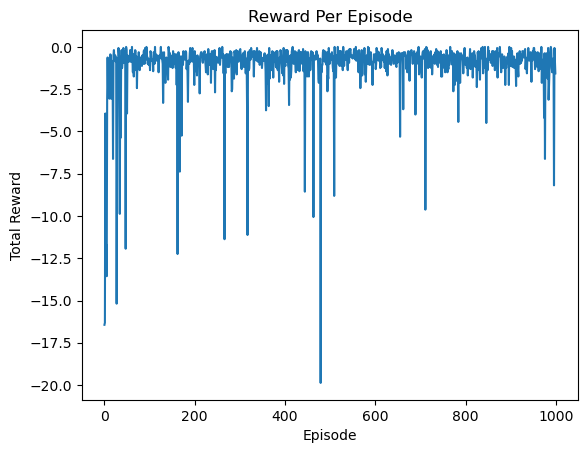

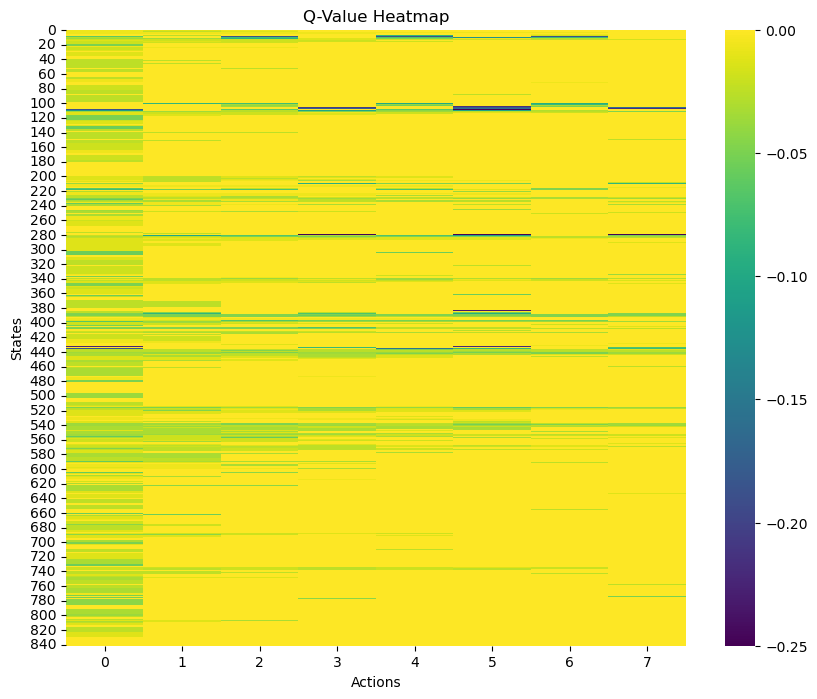

In [24]:
# 10. Train RL Agent Using Q-Learning

# Necessary imports
from collections import defaultdict
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Q-table
q_table = defaultdict(lambda: np.zeros(8))  # Assuming 8 possible actions

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate

# Training loop
env = TrafficEnv(intensity_data)  # Ensure TrafficEnv is implemented correctly
num_episodes = 1000
reward_per_episode = []  # To track rewards

for episode in range(num_episodes):
    state = tuple(env.reset())  # Initialize environment and get initial state
    done = False
    total_reward = 0

    while not done:
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit best action

        # Take action
        next_state, reward, done, _ = env.step(action)
        next_state = tuple(next_state)

        # Update Q-value
        q_table[state][action] += alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state][action]
        )

        total_reward += reward  # Accumulate reward
        state = next_state  # Update state

    reward_per_episode.append(total_reward)  # Log reward for this episode

print("Q-Learning Training Complete!")

# Visualize rewards per episode
plt.plot(reward_per_episode)
plt.title("Reward Per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

# Visualize Q-value heatmap
q_matrix = np.array([q_table[state] for state in q_table.keys()])
plt.figure(figsize=(10, 8))
sns.heatmap(q_matrix, cmap="viridis", annot=False, cbar=True)
plt.title("Q-Value Heatmap")
plt.xlabel("Actions")
plt.ylabel("States")
plt.show()

In [ ]:
# Explanation of Step 10
# 10.1 Q-Learning:
#      Used a tabular Q-learning approach to train the agent.
#       The Q-table stores state-action pairs with their corresponding Q-values.
# 10.2. Epsilon-Greedy Policy:
#       Balances exploration (trying new routes) and exploitation (choosing the best-known route).
# 10.3. Update Rule: Q-values are updated based on the Bellman equation.

In [25]:
# 11. Testing the RL Agent
# Test the RL agent
state = tuple(env.reset())  # Reset environment and get initial state
done = False
total_reward = 0

print("Testing Agent...")
while not done:
    # Choose the best action based on the trained Q-table
    action = np.argmax(q_table[state])
    next_state, reward, done, _ = env.step(action)
    state = tuple(next_state)  # Update state
    total_reward += reward  # Accumulate reward

print("Test Complete!")
print("Total Reward Achieved:", total_reward)

# Debugging: Log state-action-reward sequence during testing
state = tuple(env.reset())
done = False
print("\nState-Action-Reward Log During Testing:")
while not done:
    action = np.argmax(q_table[state])
    next_state, reward, done, _ = env.step(action)
    print(f"State: {state}, Action: {action}, Reward: {reward}")
    state = tuple(next_state)

Testing Agent...
Test Complete!
Total Reward Achieved: 0.0

State-Action-Reward Log During Testing:
State: (30.2672, -97.7431, 0.125), Action: 3, Reward: -0.0
State: (30.2672, -97.7441, 0.0), Action: 0, Reward: -0.0
State: (30.2682, -97.7441, 0.0), Action: 0, Reward: -0.0
State: (30.2692, -97.7441, 0.0), Action: 0, Reward: -0.0
State: (30.270200000000003, -97.7441, 0.0), Action: 0, Reward: -0.0
State: (30.271200000000004, -97.7441, 0.0), Action: 0, Reward: -0.0
State: (30.272200000000005, -97.7441, 0.0), Action: 0, Reward: -0.0
State: (30.273200000000006, -97.7441, 0.0), Action: 0, Reward: -0.0
State: (30.274200000000008, -97.7441, 0.0), Action: 0, Reward: -0.0
State: (30.27520000000001, -97.7441, 0.0), Action: 0, Reward: -0.0
State: (30.27620000000001, -97.7441, 0.0), Action: 1, Reward: -0.0
State: (30.27520000000001, -97.7441, 0.0), Action: 0, Reward: -0.0
State: (30.27620000000001, -97.7441, 0.0), Action: 1, Reward: -0.0
State: (30.27520000000001, -97.7441, 0.0), Action: 0, Reward: 

In [ ]:
# Explanation of Step 11
# 11.1. Agent Testing: Allowed the RL agent to navigate the traffic environment using the learned Q-table.
# 11.2. Evaluation Metric: Measured total reward as an indicator of the agent’s performance in avoiding congested areas.

# Total reward achieved at 0.0 indicates that the agent is not learning effectively or the reward functioning is not working as it is supposed to
# EDIT: Debug statements show that the reward is at -0.0

In [ ]:
# 12: Visualization of Optimal Routes

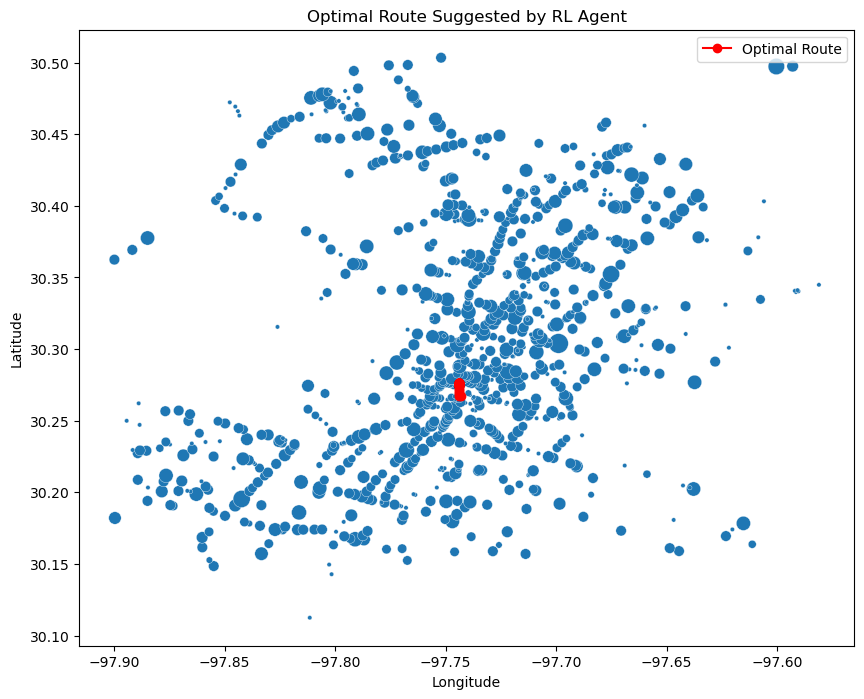

In [26]:
# Visualize the route taken by the RL agent
route_latitudes = [30.2672]
route_longitudes = [-97.7431]

state = tuple(env.reset())
done = False

while not done:
    action = np.argmax(q_table[state])
    next_state, reward, done, _ = env.step(action)
    route_latitudes.append(next_state[0])
    route_longitudes.append(next_state[1])
    state = tuple(next_state)

plt.figure(figsize=(10, 8))
sns.scatterplot(data=intensity_data, x='longitude', y='latitude', size='intensity', sizes=(10, 200), legend=False)
plt.plot(route_longitudes, route_latitudes, color='red', label='Optimal Route', marker='o')
plt.title("Optimal Route Suggested by RL Agent")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

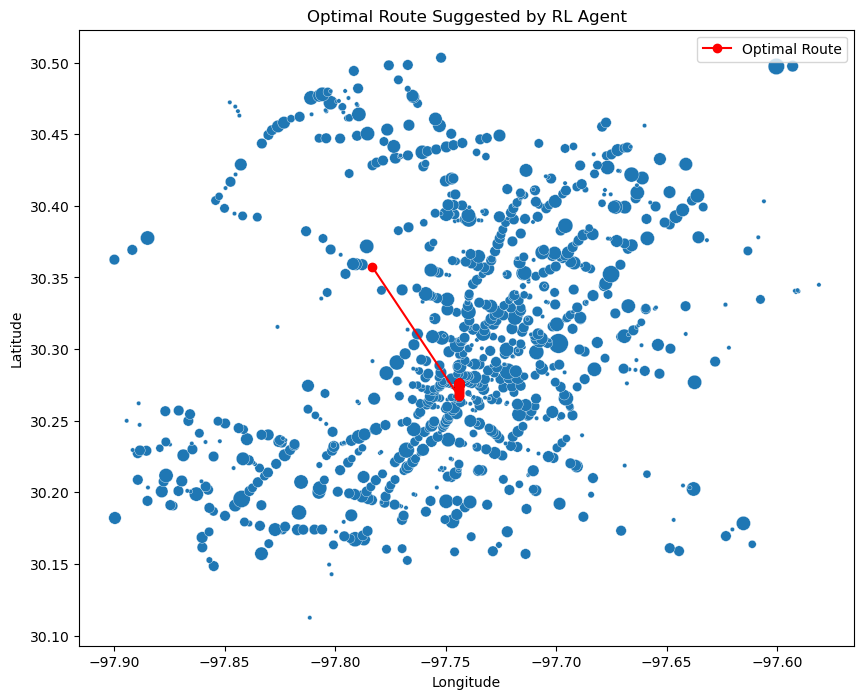

In [27]:
# Visualize the route taken by the RL agent
route_latitudes = [30.3572]
route_longitudes = [-97.7831]

state = tuple(env.reset())
done = False

while not done:
    action = np.argmax(q_table[state])
    next_state, reward, done, _ = env.step(action)
    route_latitudes.append(next_state[0])
    route_longitudes.append(next_state[1])
    state = tuple(next_state)

plt.figure(figsize=(10, 8))
sns.scatterplot(data=intensity_data, x='longitude', y='latitude', size='intensity', sizes=(10, 200), legend=False)
plt.plot(route_longitudes, route_latitudes, color='red', label='Optimal Route', marker='o')
plt.title("Optimal Route Suggested by RL Agent")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

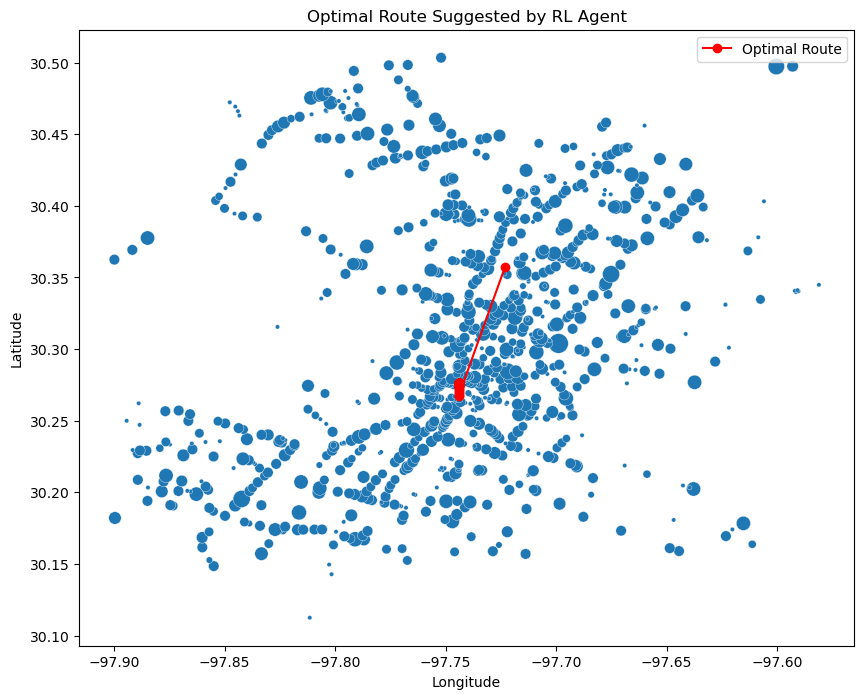

In [28]:
# Visualize the route taken by the RL agent
route_latitudes = [30.3572]
route_longitudes = [-97.7231]

state = tuple(env.reset())
done = False

while not done:
    action = np.argmax(q_table[state])
    next_state, reward, done, _ = env.step(action)
    route_latitudes.append(next_state[0])
    route_longitudes.append(next_state[1])
    state = tuple(next_state)

plt.figure(figsize=(10, 8))
sns.scatterplot(data=intensity_data, x='longitude', y='latitude', size='intensity', sizes=(10, 200), legend=False)
plt.plot(route_longitudes, route_latitudes, color='red', label='Optimal Route', marker='o')
plt.title("Optimal Route Suggested by RL Agent")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [ ]:
# Explanation of Step 12
# 12.1. Route Visualization:
#       Plotted the optimal route taken by the RL agent on the traffic intensity map.
# 12.2. Route Overlay:
#       Highlighted the route as a red line with markers for intermediate points.